In [120]:
# Dependencies
import os
import pathlib
import requests
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st
from uszipcode import SearchEngine


In [122]:
# Study data files
last_path = "./data/merged_df_cleaned1806.csv"

In [123]:
# Read the brewery data and the study results
last_df = pd.read_csv(last_path, index_col="City")

In [124]:
# Display dataframe
last_df.head()

,name,brewery_type,address_1,State,postal_code,longitude,latitude,state_x,zip_code,brewery_id,...,income_household_median,income_family_median,income_nonfamily_median,earnings_median,employment_total,employment_male,employment_female,occupancy_status_total,occupancy_status_occupied,occupancy_status_vacant
City,,,,,,,,,,,,,,,,,,,,,
Norman,(405) Brewing Co,micro,1716 Topeka St,Oklahoma,73069-8224,-97.468182,35.257389,Oklahoma,73069.0,1,...,71963.0,59063.0,28261.0,31076.0,18444.0,44975.0,46495.0,57307.0,53446.0,3861.0
San Diego,10 Barrel Brewing Co,large,1501 E St,California,92101-6618,-117.129593,32.714813,California,92101.0,3,...,93042.0,107093.0,74377.0,48579.0,1150367.0,502249.0,457320.0,555456.0,521000.0,34456.0
Bend,10 Barrel Brewing Co,large,62970 18th St,Oregon,97701-9847,-121.281706,44.086835,Oregon,97701.0,4,...,55398.0,86510.0,37802.0,49717.0,32362.0,32384.0,30907.0,47882.0,44620.0,3262.0
Bend,10 Barrel Brewing Co,large,1135 NW Galveston Ave Ste B,Oregon,97703-2465,-121.328802,44.057565,Oregon,97703.0,5,...,55398.0,86510.0,37802.0,49717.0,32362.0,32384.0,30907.0,47882.0,44620.0,3262.0
Portland,10 Barrel Brewing Co,large,1411 NW Flanders St,Oregon,97209-2620,-122.685506,45.525979,Oregon,97209.0,6,...,36125.0,79590.0,40542.0,46590.0,50737.0,229443.0,227784.0,303483.0,286734.0,16749.0


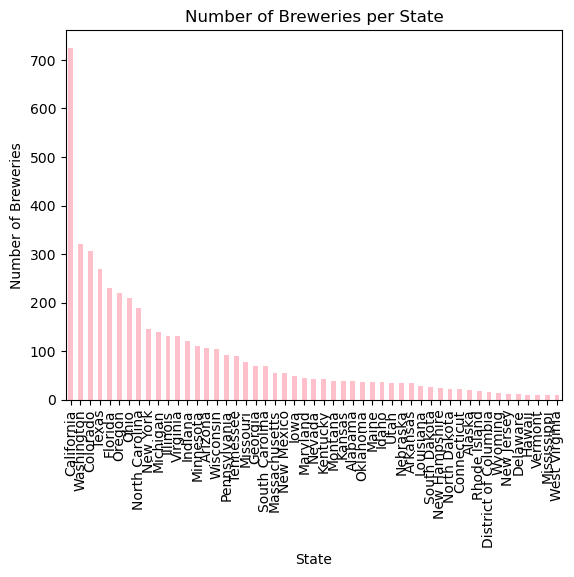

In [141]:
# plot Breweries per State
data_count = last_df["State"].value_counts()
plot_pandas = data_count.plot.bar(color='pink')  
plt.xlabel("State")
plt.ylabel("Number of Breweries")
plt.title("Number of Breweries per State")
plt.savefig("./data/perState.png")

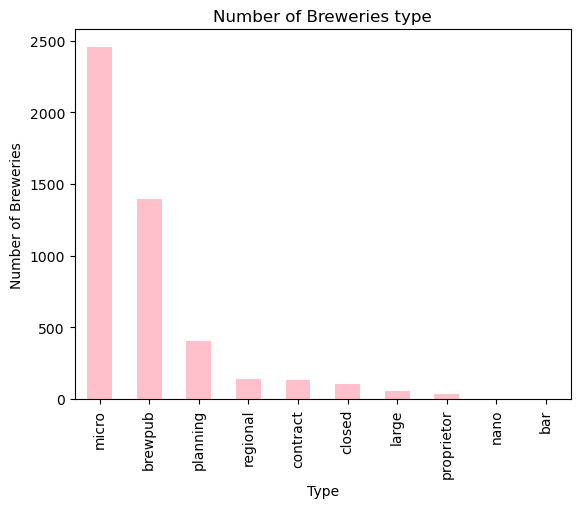

In [142]:
# Plot per type
data_count4 =last_df["brewery_type"].value_counts()
plot_pandas = data_count4.plot.bar(color='pink')  
plt.xlabel("Type")
plt.ylabel("Number of Breweries")
plt.title("Number of Breweries type")
plt.savefig("./data/type.png")

In [143]:
# Plot brewery type per state
countState = last_df.groupby(["State", "brewery_type"])["brewery_type"].count()
countState

State      brewery_type
Alabama    brewpub          4
           contract         1
           micro           27
           planning         6
Alaska     brewpub          7
                           ..
Wisconsin  proprietor       1
           regional         5
Wyoming    brewpub          5
           micro            7
           planning         2
Name: brewery_type, Length: 274, dtype: int64

In [144]:
countStateindex = countState.index
countStateindex

MultiIndex([(  'Alabama',    'brewpub'),
            (  'Alabama',   'contract'),
            (  'Alabama',      'micro'),
            (  'Alabama',   'planning'),
            (   'Alaska',    'brewpub'),
            (   'Alaska',   'contract'),
            (   'Alaska',      'micro'),
            (   'Alaska',   'planning'),
            (   'Alaska',   'regional'),
            (  'Arizona',    'brewpub'),
            ...
            ('Wisconsin',    'brewpub'),
            ('Wisconsin',   'contract'),
            ('Wisconsin',      'large'),
            ('Wisconsin',      'micro'),
            ('Wisconsin',   'planning'),
            ('Wisconsin', 'proprietor'),
            ('Wisconsin',   'regional'),
            (  'Wyoming',    'brewpub'),
            (  'Wyoming',      'micro'),
            (  'Wyoming',   'planning')],
           names=['State', 'brewery_type'], length=274)

In [145]:
countStateindex2 = countState.unstack()
countStateindex2

brewery_type,bar,brewpub,closed,contract,large,micro,nano,planning,proprietor,regional
State,,,,,,,,,,
Alabama,NaN,4.0,NaN,1.0,NaN,27.0,NaN,6.0,NaN,NaN
Alaska,NaN,7.0,NaN,1.0,NaN,10.0,NaN,1.0,NaN,1.0
Arizona,NaN,41.0,NaN,4.0,2.0,47.0,NaN,12.0,NaN,1.0
Arkansas,NaN,15.0,NaN,1.0,NaN,17.0,NaN,1.0,NaN,NaN
California,NaN,185.0,40.0,19.0,13.0,384.0,NaN,52.0,10.0,22.0
Colorado,NaN,80.0,NaN,9.0,6.0,170.0,NaN,29.0,2.0,11.0
Connecticut,NaN,6.0,1.0,1.0,NaN,10.0,NaN,4.0,NaN,NaN
Delaware,NaN,4.0,NaN,NaN,1.0,5.0,NaN,2.0,NaN,NaN
District of Columbia,NaN,6.0,NaN,2.0,NaN,5.0,NaN,2.0,NaN,1.0


<Axes: xlabel='State'>

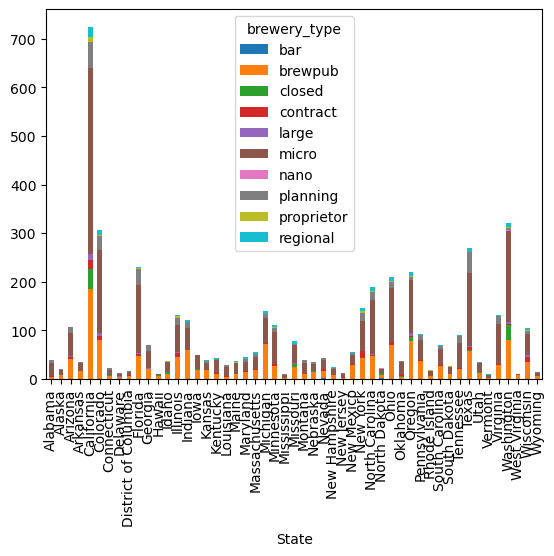

In [146]:
# Plot states stacked
countStateindex2.plot(kind='bar', stacked=True)

<Axes: xlabel='State'>

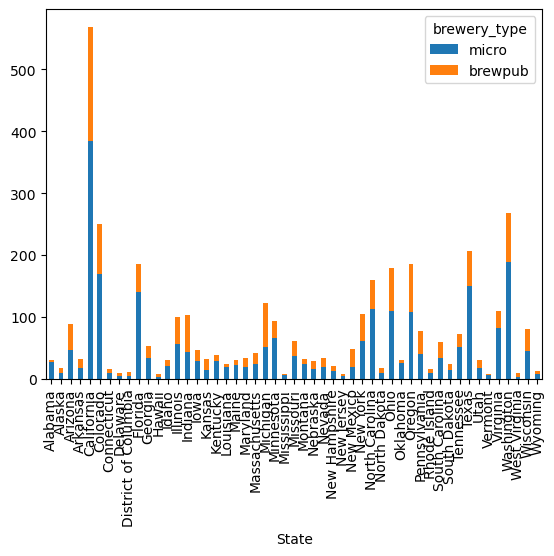

In [147]:
microbrewState = countStateindex2.plot(kind='bar', y=['micro', 'brewpub'], stacked=True)
microbrewState

<Axes: xlabel='State'>

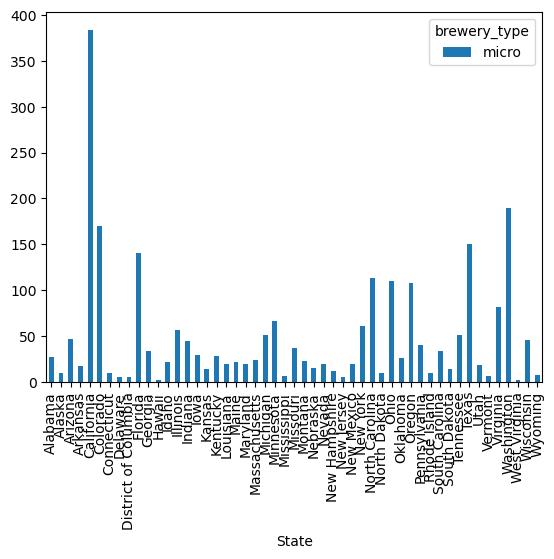

In [171]:
microbrewState = countStateindex2.plot(kind='bar', y=['micro'], stacked=True)
microbrewState

<Axes: xlabel='State'>

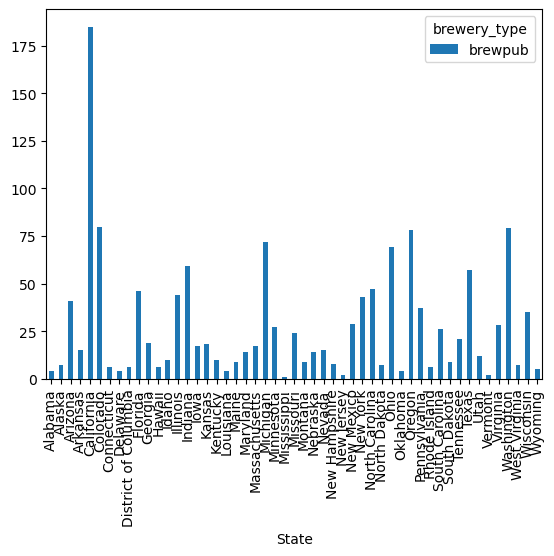

In [172]:
microbrewState = countStateindex2.plot(kind='bar', y=['brewpub'], stacked=True)
microbrewState

In [148]:
# Plot brewery type top 10 states
# We need to change top10 for the new top10
topstates = countStateindex2.loc[["California", "Colorado", "Texas", "Washington","Oregon", "Florida", "North Carolina", "Ohio", "Arizona", "Illinois"]]
topstates

brewery_type,bar,brewpub,closed,contract,large,micro,nano,planning,proprietor,regional
State,,,,,,,,,,
California,NaN,185.0,40.0,19.0,13.0,384.0,NaN,52.0,10.0,22.0
Colorado,NaN,80.0,NaN,9.0,6.0,170.0,NaN,29.0,2.0,11.0
Texas,NaN,57.0,2.0,6.0,3.0,150.0,NaN,44.0,NaN,7.0
Washington,NaN,79.0,31.0,3.0,3.0,189.0,1.0,5.0,2.0,7.0
Oregon,NaN,78.0,8.0,3.0,6.0,108.0,NaN,7.0,1.0,8.0
Florida,NaN,46.0,NaN,4.0,4.0,140.0,NaN,31.0,3.0,3.0
North Carolina,NaN,47.0,NaN,2.0,1.0,113.0,NaN,15.0,2.0,8.0
Ohio,NaN,69.0,1.0,5.0,1.0,110.0,NaN,14.0,1.0,8.0
Arizona,NaN,41.0,NaN,4.0,2.0,47.0,NaN,12.0,NaN,1.0


Text(0, 0.5, 'Number of Breweries')

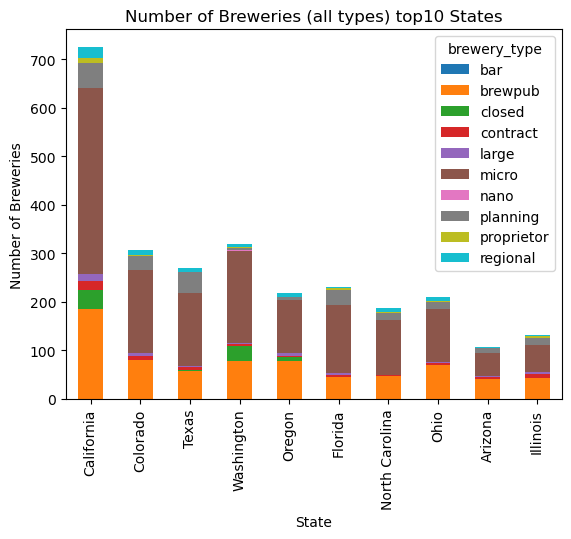

In [149]:
topstates.plot(kind='bar', stacked=True)
plt.title('Number of Breweries (all types) top10 States')
plt.xlabel('State')
plt.ylabel('Number of Breweries')

Text(0, 0.5, 'Number of Breweries')

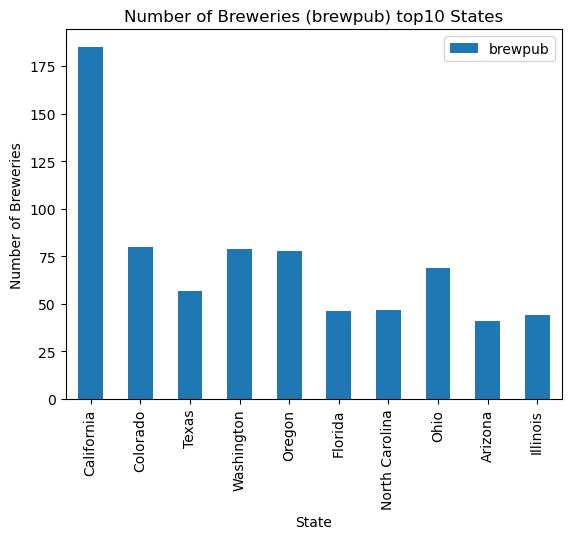

In [150]:
topstates.plot(kind='bar', y='brewpub', stacked=True)
plt.title('Number of Breweries (brewpub) top10 States')
plt.xlabel('State')
plt.ylabel('Number of Breweries')

Text(0, 0.5, 'Number of Breweries')

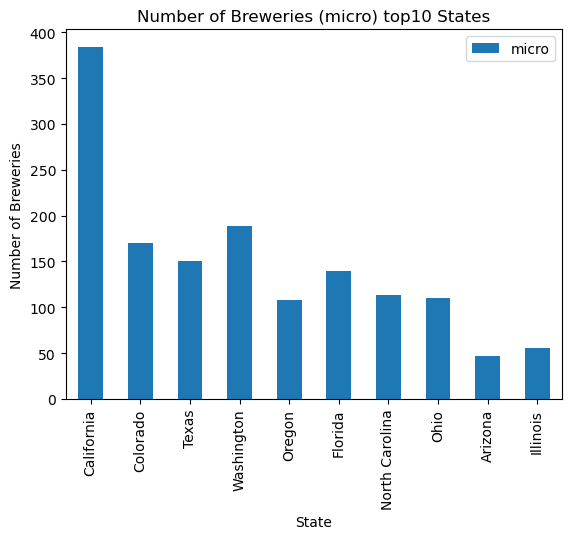

In [151]:
topstates.plot(kind='bar', y='micro', stacked=True)
plt.title('Number of Breweries (micro) top10 States')
plt.xlabel('State')
plt.ylabel('Number of Breweries')

Text(0, 0.5, 'Number of Breweries')

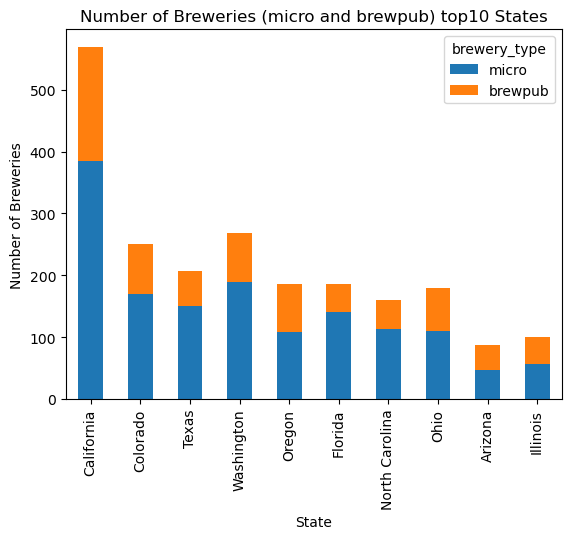

In [152]:
topstates.plot(kind='bar', y=['micro', 'brewpub'], stacked=True)
plt.title('Number of Breweries (micro and brewpub) top10 States')
plt.xlabel('State')
plt.ylabel('Number of Breweries')

In [153]:
# Plot brewery type tail 10 states
tailstates = countStateindex2.loc[["District of Columbia","Connecticut", "North Dakota", "New Hampshire", "Idaho", "Delaware", "Wyoming", "New Jersey", "Mississippi", "Kentucky"]]
tailstates

brewery_type,bar,brewpub,closed,contract,large,micro,nano,planning,proprietor,regional
State,,,,,,,,,,
District of Columbia,NaN,6.0,NaN,2.0,NaN,5.0,NaN,2.0,NaN,1.0
Connecticut,NaN,6.0,1.0,1.0,NaN,10.0,NaN,4.0,NaN,NaN
North Dakota,1.0,7.0,3.0,NaN,NaN,10.0,1.0,NaN,NaN,NaN
New Hampshire,NaN,8.0,NaN,NaN,NaN,12.0,NaN,3.0,NaN,1.0
Idaho,NaN,10.0,3.0,NaN,1.0,21.0,NaN,NaN,1.0,NaN
Delaware,NaN,4.0,NaN,NaN,1.0,5.0,NaN,2.0,NaN,NaN
Wyoming,NaN,5.0,NaN,NaN,NaN,7.0,NaN,2.0,NaN,NaN
New Jersey,NaN,2.0,NaN,1.0,1.0,5.0,NaN,3.0,NaN,NaN
Mississippi,NaN,1.0,NaN,1.0,NaN,6.0,NaN,1.0,NaN,NaN


Text(0, 0.5, 'Number of Breweries')

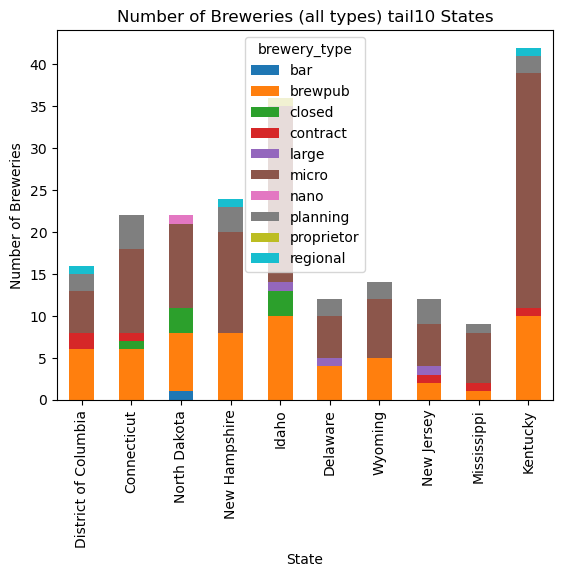

In [154]:
tailstates.plot(kind='bar', stacked=True)
plt.title('Number of Breweries (all types) tail10 States')
plt.xlabel('State')
plt.ylabel('Number of Breweries')

Text(0, 0.5, 'Number of Breweries')

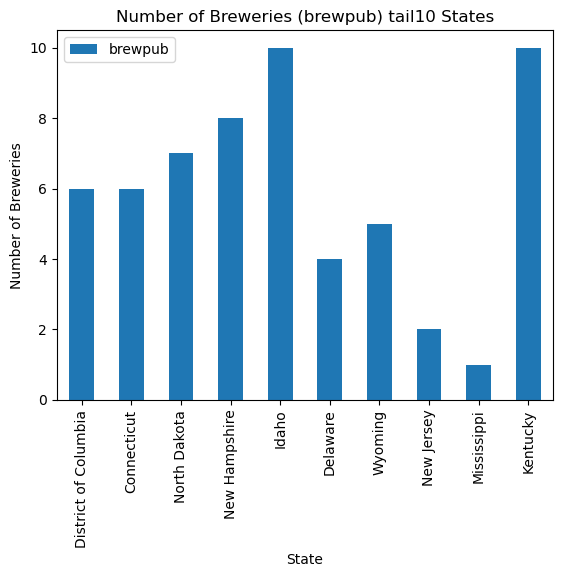

In [155]:
tailstates.plot(kind='bar', y='brewpub', stacked=True)
plt.title('Number of Breweries (brewpub) tail10 States')
plt.xlabel('State')
plt.ylabel('Number of Breweries')

Text(0, 0.5, 'Number of Breweries')

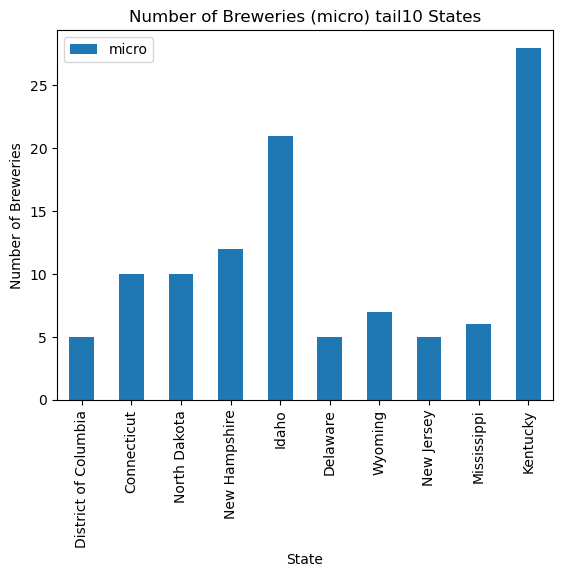

In [156]:
tailstates.plot(kind='bar', y='micro', stacked=True)
plt.title('Number of Breweries (micro) tail10 States')
plt.xlabel('State')
plt.ylabel('Number of Breweries')

Text(0, 0.5, 'Number of Breweries')

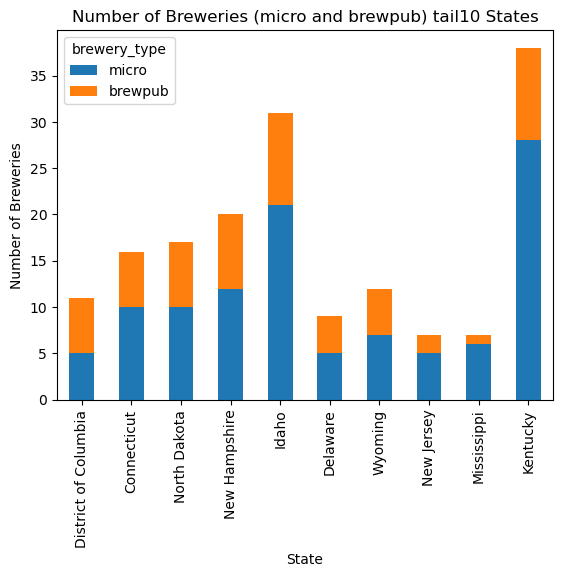

In [157]:
tailstates.plot(kind='bar', y=['micro', 'brewpub'], stacked=True)
plt.title('Number of Breweries (micro and brewpub) tail10 States')
plt.xlabel('State')
plt.ylabel('Number of Breweries')

# Demographics for top states and cities

In [158]:
# Demographics total population
demogtotpopState = last_df.groupby(['State']).population_total.mean()
demogtotpopState

State
Alabama                 1.354198e+05
Alaska                  2.113497e+05
Arizona                 4.956868e+05
Arkansas                1.114171e+05
California              5.236191e+05
Colorado                3.213297e+05
Connecticut             9.512182e+04
Delaware                4.713892e+04
District of Columbia    6.700500e+05
Florida                 2.138448e+05
Georgia                 2.076506e+05
Hawaii                  3.455320e+05
Idaho                   1.445619e+05
Illinois                1.353783e+06
Indiana                 3.003495e+05
Iowa                    9.098014e+04
Kansas                  1.755985e+05
Kentucky                3.998457e+05
Louisiana               2.268161e+05
Maine                   4.716703e+04
Maryland                2.900200e+05
Massachusetts           1.960219e+05
Michigan                1.389692e+05
Minnesota               2.346324e+05
Mississippi             5.287133e+04
Missouri                2.769096e+05
Montana                 6.494664

Text(0, 0.5, 'Total Population')

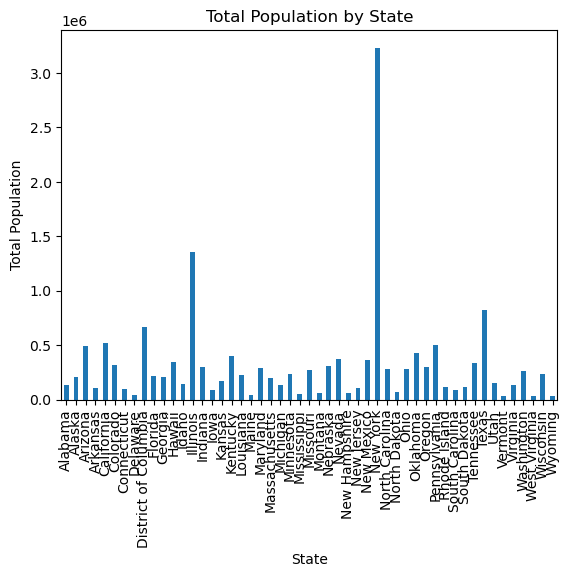

In [159]:
demogtotpopState.plot(kind='bar', stacked=True)
plt.title('Total Population by State')
plt.xlabel('State')
plt.ylabel('Total Population')

In [161]:
# income_household_median
demogIncomeHouseholdState = last_df.groupby(['State']).income_household_median.mean()
demogIncomeHouseholdState

State
Alabama                  56452.236842
Alaska                   82591.500000
Arizona                  71187.943925
Arkansas                 59020.205882
California               93356.617931
Colorado                 82940.013029
Connecticut              61391.909091
Delaware                 57607.750000
District of Columbia     90088.000000
Florida                  60278.298701
Georgia                  74739.042857
Hawaii                   73434.000000
Idaho                    65445.111111
Illinois                 68738.496183
Indiana                  60346.991667
Iowa                     60703.510204
Kansas                   62455.447368
Kentucky                 56827.547619
Louisiana                45465.862069
Maine                    63608.297297
Maryland                 70360.222222
Massachusetts            79751.909091
Michigan                 55917.683453
Minnesota                75551.432432
Mississippi              37986.555556
Missouri                 58001.089744
Montan

Text(0, 0.5, 'Income Household')

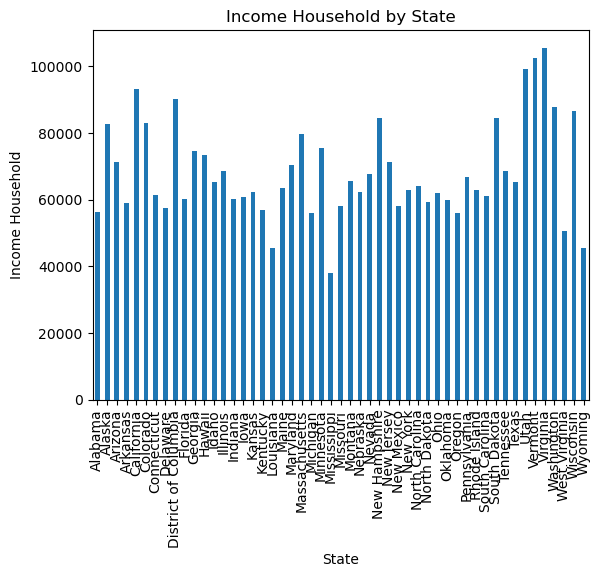

In [164]:
demogIncomeHouseholdState.plot(kind='bar', stacked=True)
plt.title('Income Household by State')
plt.xlabel('State')
plt.ylabel('Income Household')

In [160]:
# Demographics percentage population over 21
# This variable is not in the new dataframe
demog21State = last_df.groupby(['State']).population_over_21_percent.mean()
demog21State 

AttributeError: 'DataFrameGroupBy' object has no attribute 'population_over_21_percent'

The top 3 states with more total population: Illinois, New York and Texas.

Text(0, 0.5, '% Population over 21')

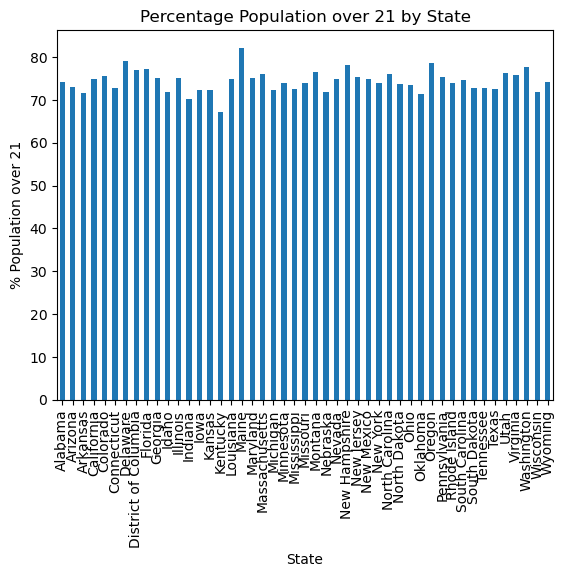

In [105]:
demog21State.plot(kind='bar', stacked=True)
plt.title('Percentage Population over 21 by State')
plt.xlabel('State')
plt.ylabel('% Population over 21')

Population over 21 seems to be evenly distributed across states

In [165]:
# Demographics housing
# Varibale not in the new dataset
demoghousing = last_df.groupby(['State']).housing_in_structure_percent.mean()
demoghousing

AttributeError: 'DataFrameGroupBy' object has no attribute 'housing_in_structure_percent'

Text(0, 0.5, 'Housing')

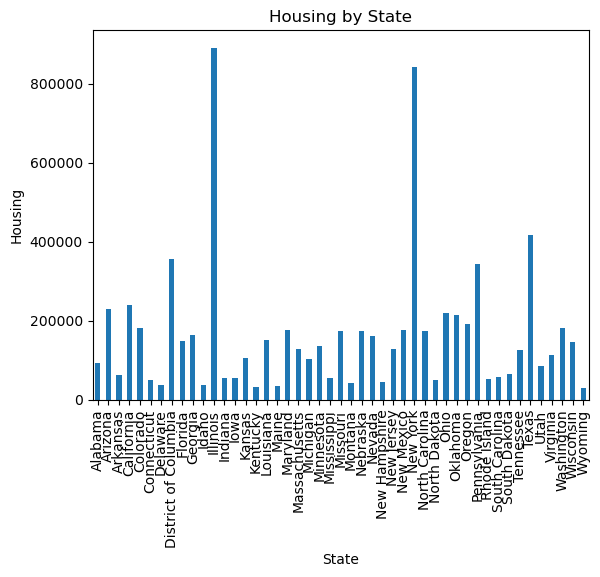

In [118]:
demoghousing.plot(kind='bar', stacked=True)
plt.title('Housing by State')
plt.xlabel('State')
plt.ylabel('Housing')

In [ ]:
# Plot demographics per City

In [166]:
# Demographics
demogCity = last_df.groupby(['State', 'City']).population_total.mean()
demogCity

State    City        
Alabama  Alabaster        33670.0
         Anniston         21545.0
         Birmingham      196410.0
         Decatur          57754.0
         Dothan           71283.0
                           ...   
Wyoming  Cheyenne         65048.0
         Gillette         33061.0
         Laramie          28531.0
         Rock Springs     20787.0
         Sheridan         20724.0
Name: population_total, Length: 1095, dtype: float64

In [167]:
demogCity.unstack()

City,Aberdeen,Abilene,Adrian,Aiken,Akron,Alabaster,Alameda,Albany,Albuquerque,Alexandria,...,Yonkers,Yorba Linda,York,Youngstown,Ypsilanti,Yuba City,Yucaipa,Yuma,Zanesville,Zephyrhills
State,,,,,,,,,,,,,,,,,,,,,
Alabama,NaN,NaN,NaN,NaN,NaN,33670.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Alaska,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Arizona,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,97097.0,NaN,NaN
Arkansas,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
California,NaN,NaN,NaN,NaN,NaN,NaN,76352.0,NaN,NaN,NaN,...,NaN,67992.0,NaN,NaN,NaN,69544.0,54739.0,NaN,NaN,NaN
Colorado,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Connecticut,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Delaware,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
District of Columbia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [168]:
CitytopStates = demogCity.loc(['Illinois', 'Texas', 'New York'], :)

SyntaxError: invalid syntax (3014211379.py, line 1)

Text(0, 0.5, 'Total Population')

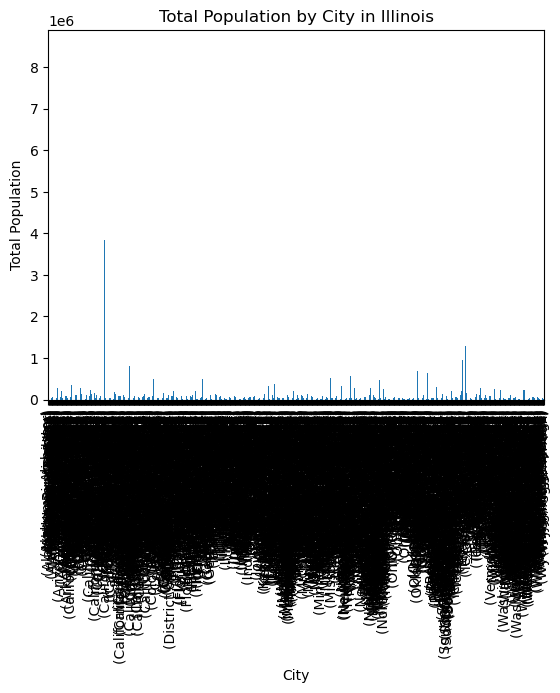

In [170]:
# Plot population per top 1 State 'Illinois'
demogCity.plot(kind='bar', y='Illinois', stacked=True)
plt.title('Total Population by City in Illinois')
plt.xlabel('City')
plt.ylabel('Total Population')

In [107]:
# Population over 21 per city
# Varible not in new dataset
demog21City = last_df.groupby(['State', 'City']).population_over_21_percent.mean()
demogCity

State      City      
Alabama    Birmingham    75.4
           Dothan        73.6
           Huntsville    76.3
           Mobile        74.0
           Montgomery    71.1
                         ... 
Wisconsin  Milwaukee     68.7
           Oshkosh       76.3
           Racine        70.0
           Waukesha      77.4
Wyoming    Cheyenne      74.1
Name: population_over_21_percent, Length: 452, dtype: float64

Text(0, 0.5, 'Percentage Population over 21')

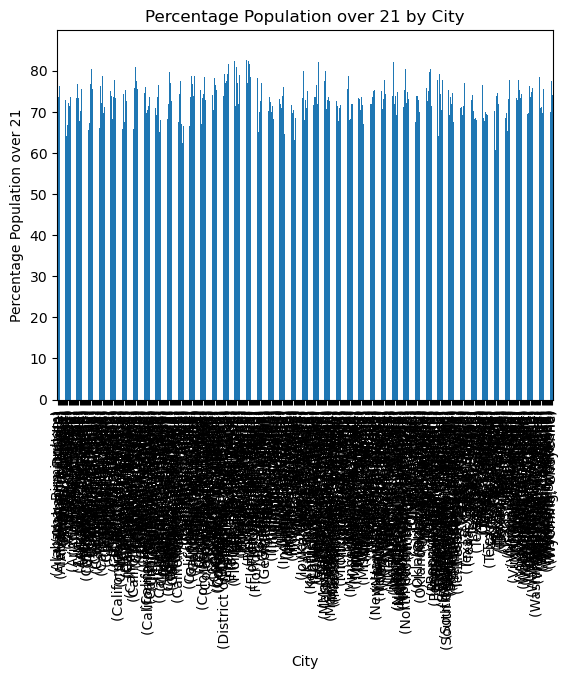

In [108]:
# Plot population over 21 per top 3 cities
# Vairble not in new dataset
demog21City.plot(kind='bar', y=['Illinois', 'New York', 'Texas'], stacked=True)
plt.title('Percentage Population over 21 by City')
plt.xlabel('City')
plt.ylabel('Percentage Population over 21')

In [ ]:
# Correlate Pop Brew

TotPop = demogtotpopState.loc['Illinois', 'New York', 'Texas']
BrewType = data_count4.loc['Illinois', 'New York', 'Texas']
correlation = st.pearsonr(TotPop,BrewType)
plt.scatter(TotPop,BrewType)
plt.title('Breweries by Total Population')
plt.xlabel('Total Population')
plt.ylabel('Breweries')
print(f"The correlation between both factors is {round(correlation[0],2)}")
plt.show()